In [266]:
# infos about dataset
info_data = [
    {'title': 'Normal Baseline Data', 'hp': 0, 'rpm': 1797, 'file': 'normal_0.mat'},
    {'title': 'Normal Baseline Data', 'hp': 1, 'rpm': 1772, 'file': 'normal_1.mat'},
    {'title': 'Normal Baseline Data', 'hp': 2, 'rpm': 1750, 'file': 'normal_2.mat'},
    {'title': 'Normal Baseline Data', 'hp': 3, 'rpm': 1730, 'file': 'normal_3.mat'},
    {'title': '12k Drive End Bearing Fault Data', 'hp': 0, 'rpm': 1797, 'file': 'ir021_0.mat'},    
    {'title': '12k Drive End Bearing Fault Data', 'hp': 0, 'rpm': 1797, 'file': 'b021_0.mat'},    
    {'title': '12k Drive End Bearing Fault Data', 'hp': 0, 'rpm': 1797, 'file': 'or021_3_0.mat'},    
    {'title': '12k Drive End Bearing Fault Data', 'hp': 0, 'rpm': 1797, 'file': 'or021_6_0.mat'},    
    {'title': '12k Drive End Bearing Fault Data', 'hp': 0, 'rpm': 1797, 'file': 'or021_12_0.mat'},    
    {'title': '12k Drive End Bearing Fault Data', 'hp': 3, 'rpm': 1730, 'file': 'ir021_3.mat'},
    {'title': '12k Drive End Bearing Fault Data', 'hp': 3, 'rpm': 1730, 'file': 'b021_3.mat'},
    {'title': '12k Drive End Bearing Fault Data', 'hp': 3, 'rpm': 1730, 'file': 'or021_3_3.mat'},
    {'title': '12k Drive End Bearing Fault Data', 'hp': 3, 'rpm': 1730, 'file': 'or021_6_3.mat'},
    {'title': '12k Drive End Bearing Fault Data', 'hp': 3, 'rpm': 1730, 'file': 'or021_12_3.mat'}
]

In [267]:
# loading the data
def load_data(file_name):
    
    import scipy.io
    
    data_loaded = scipy.io.loadmat(file_name)
    
    return data_loaded


In [268]:
# Gets the titles of useful data for analysis and return the list of titles
def get_useful_data_by_title(data, sample_size=512, regex = r"X\d{3}_\w{2}_\w+"):
    
    import re
    import numpy as np
    import pandas as pd

    keys = str(data.keys())
    match = re.findall(regex, keys)    

    data = {titulo: data[titulo].reshape(-1)[:sample_size] for titulo in match}
    
    df = pd.DataFrame(data)
    
    return df


In [275]:
# plots using the scatter plot
def plot(sample, title='', label=None, xlabel='time (ms)', ylabel='amplitude'):
    
    import matplotlib.pyplot as plt
    import numpy as np
    
    plt.figure(figsize=(25,8))
    plt.plot(np.arange(len(sample)), sample, label=label)
    plt.ylim(-1, 1)  # fixing the y-axis between -1 and 1
    plt.legend()
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.show()


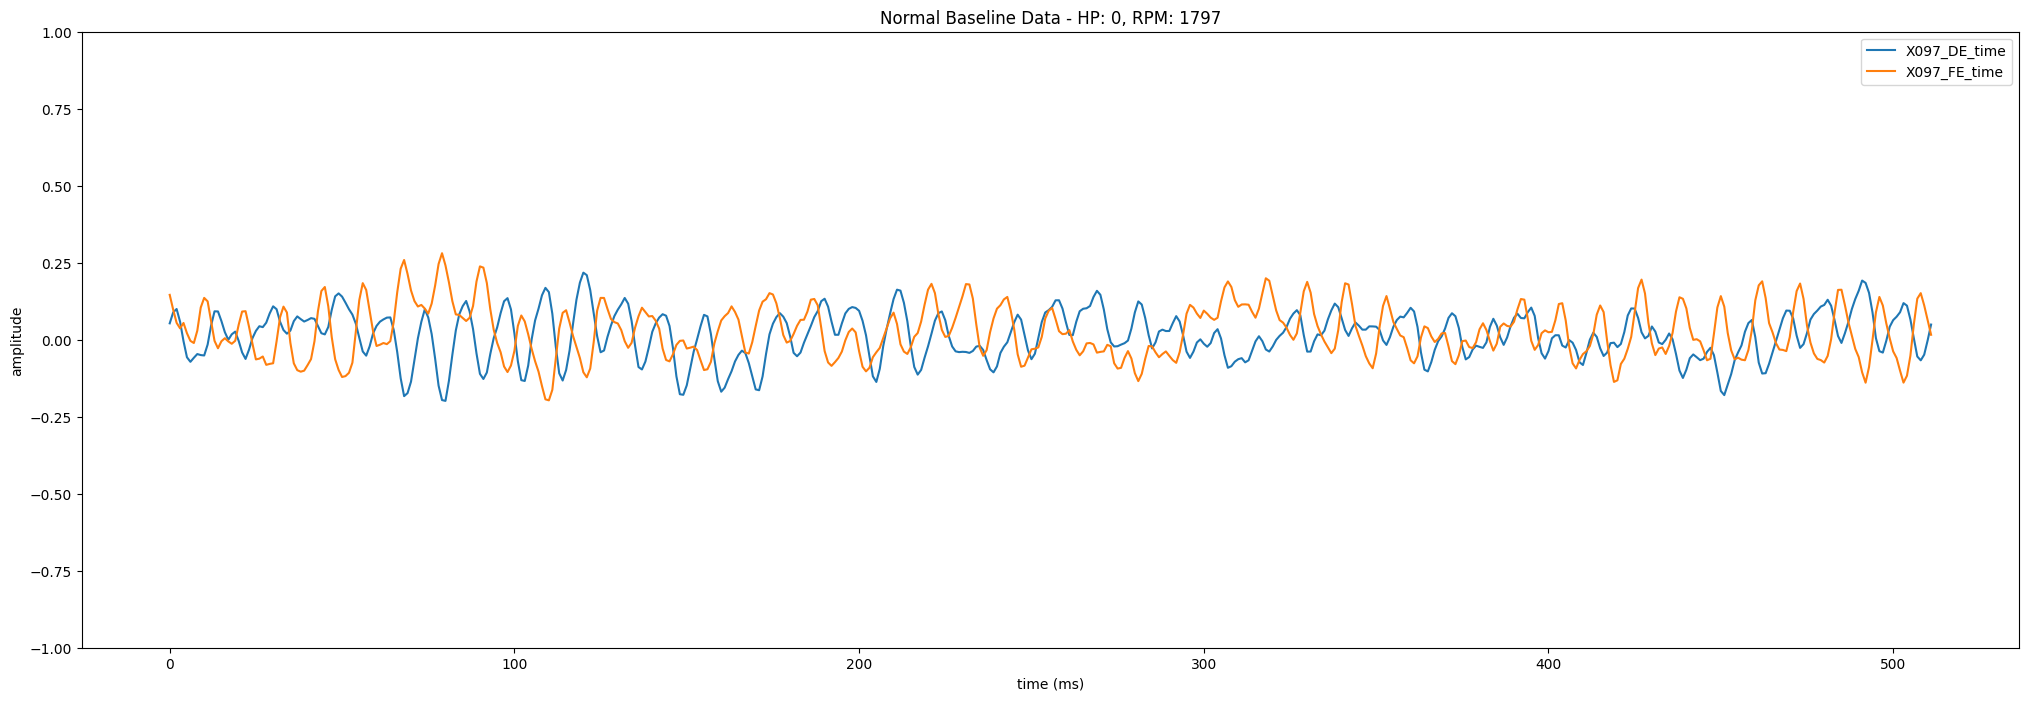

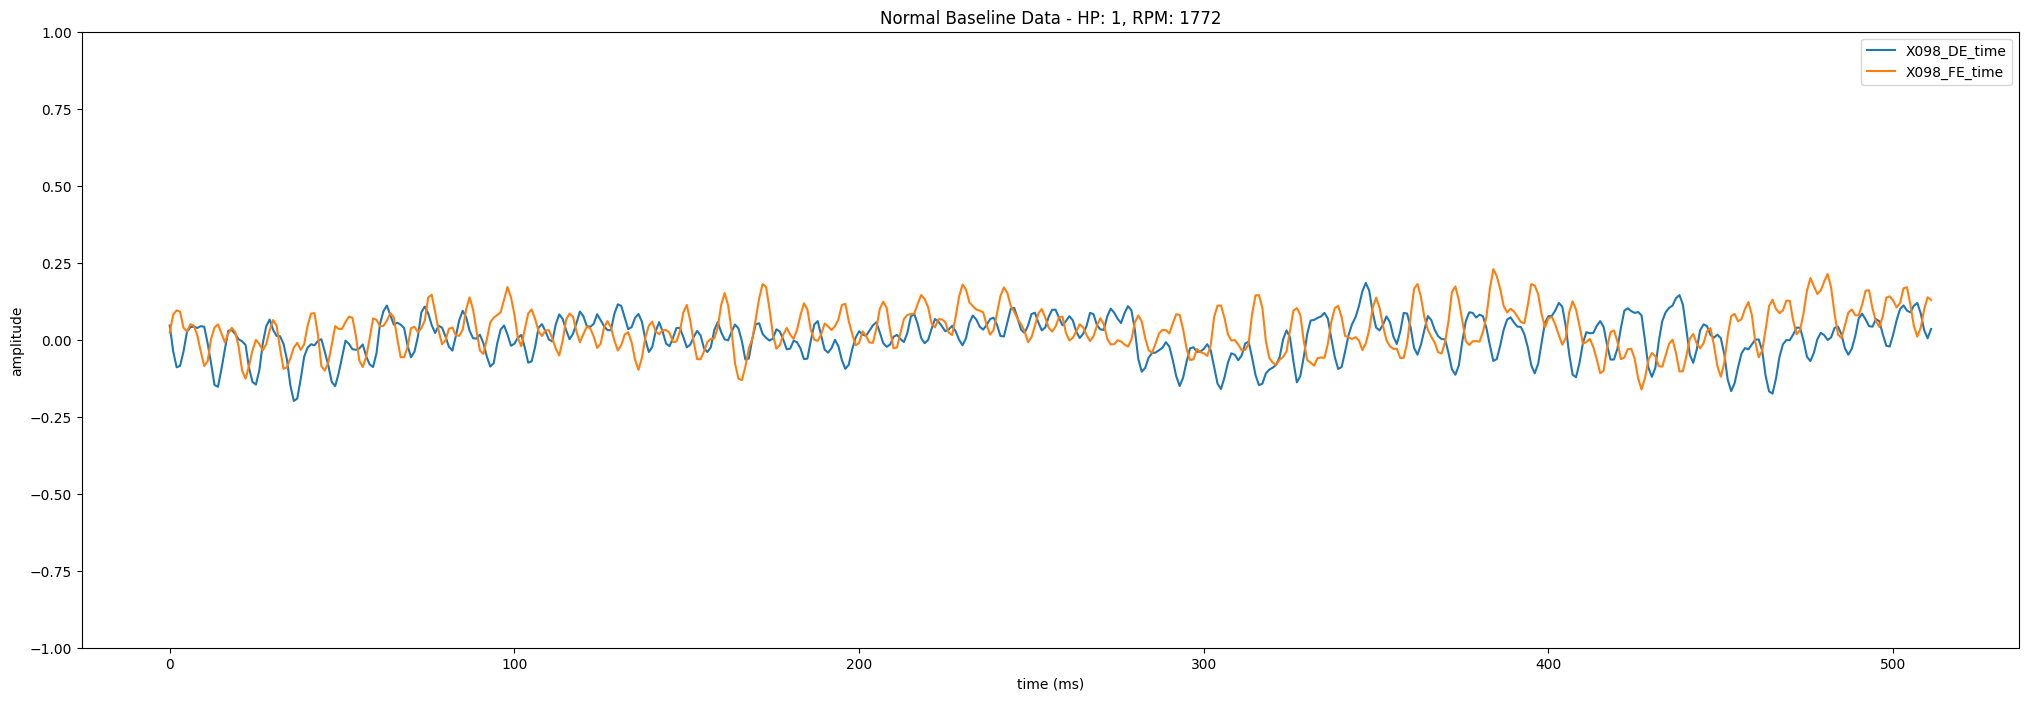

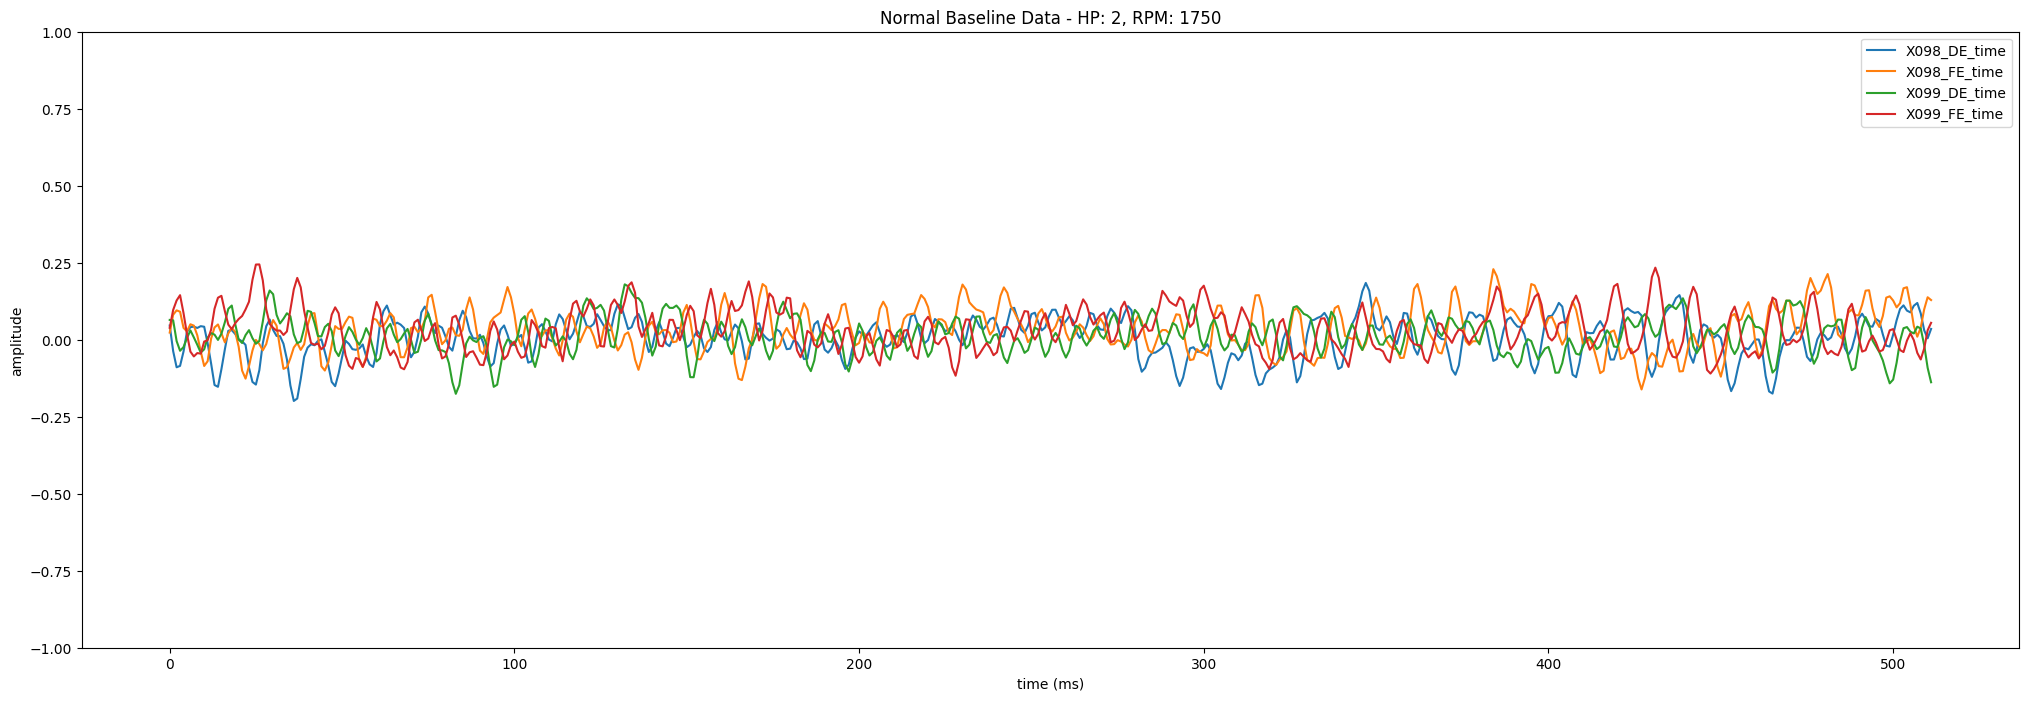

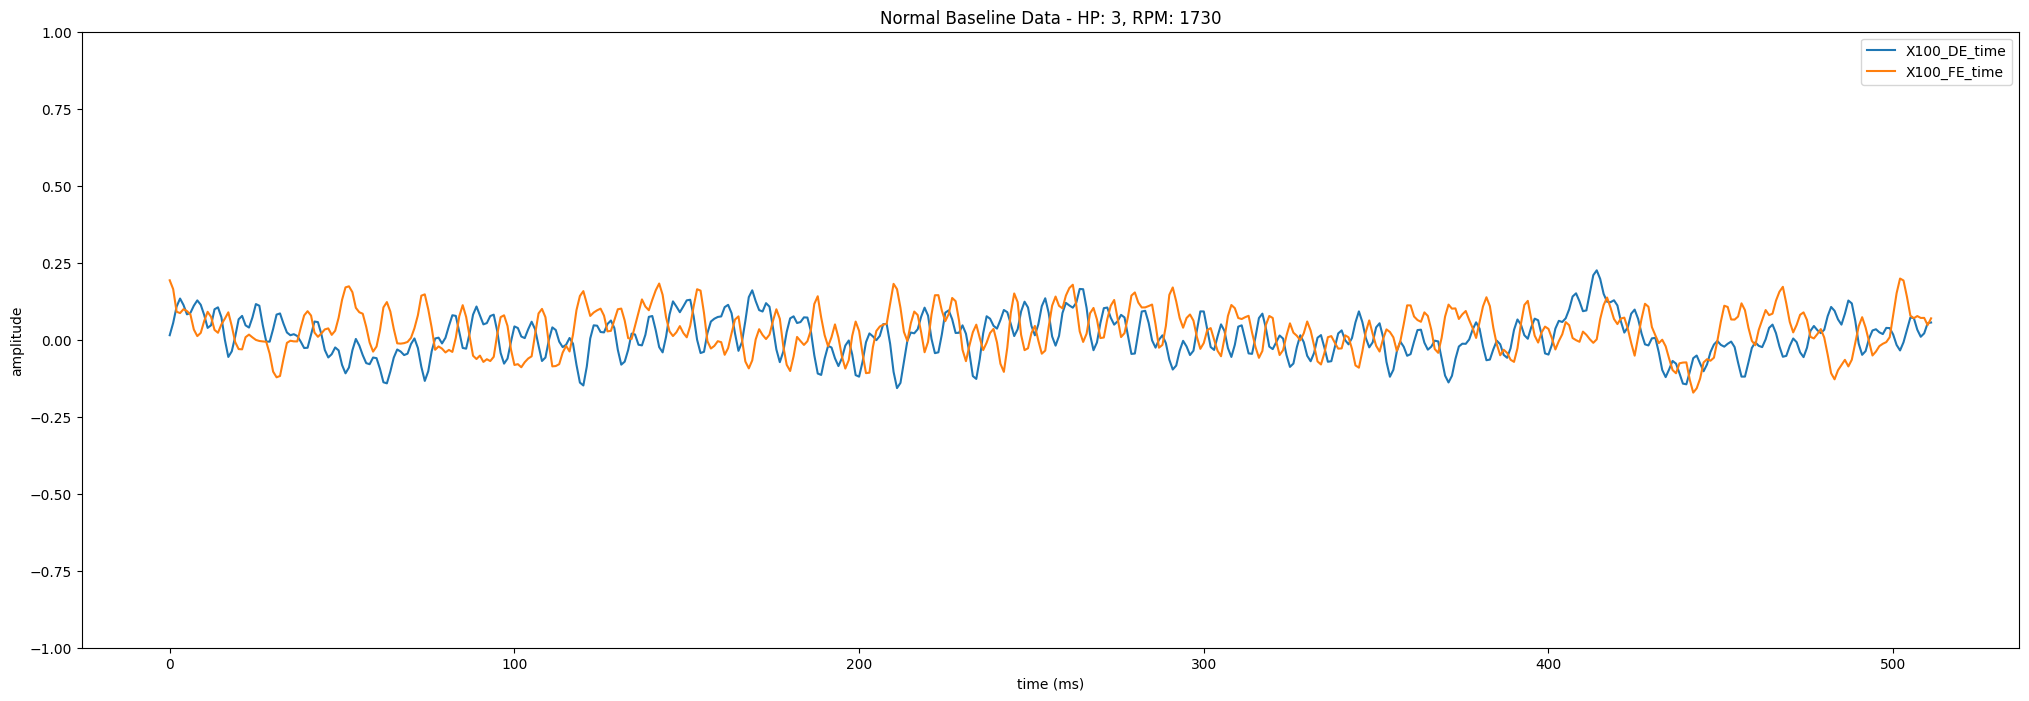

In [276]:
# plotting normal baseline data
sample_size = 512

info_filtered = [info for info in info_data if info['title'] == 'Normal Baseline Data']

for info in info_filtered:
    # get infos
    title, hp, rpm, file = info['title'], info['hp'], info['rpm'], info['file']
    
    # loading data
    file_data = load_data(file)
    
    # geting useful data
    sample = get_useful_data_by_title(file_data, sample_size)
    
    plot(sample, title=f'{title} - HP: {hp}, RPM: {rpm}', label=sample.columns)

Inner Race


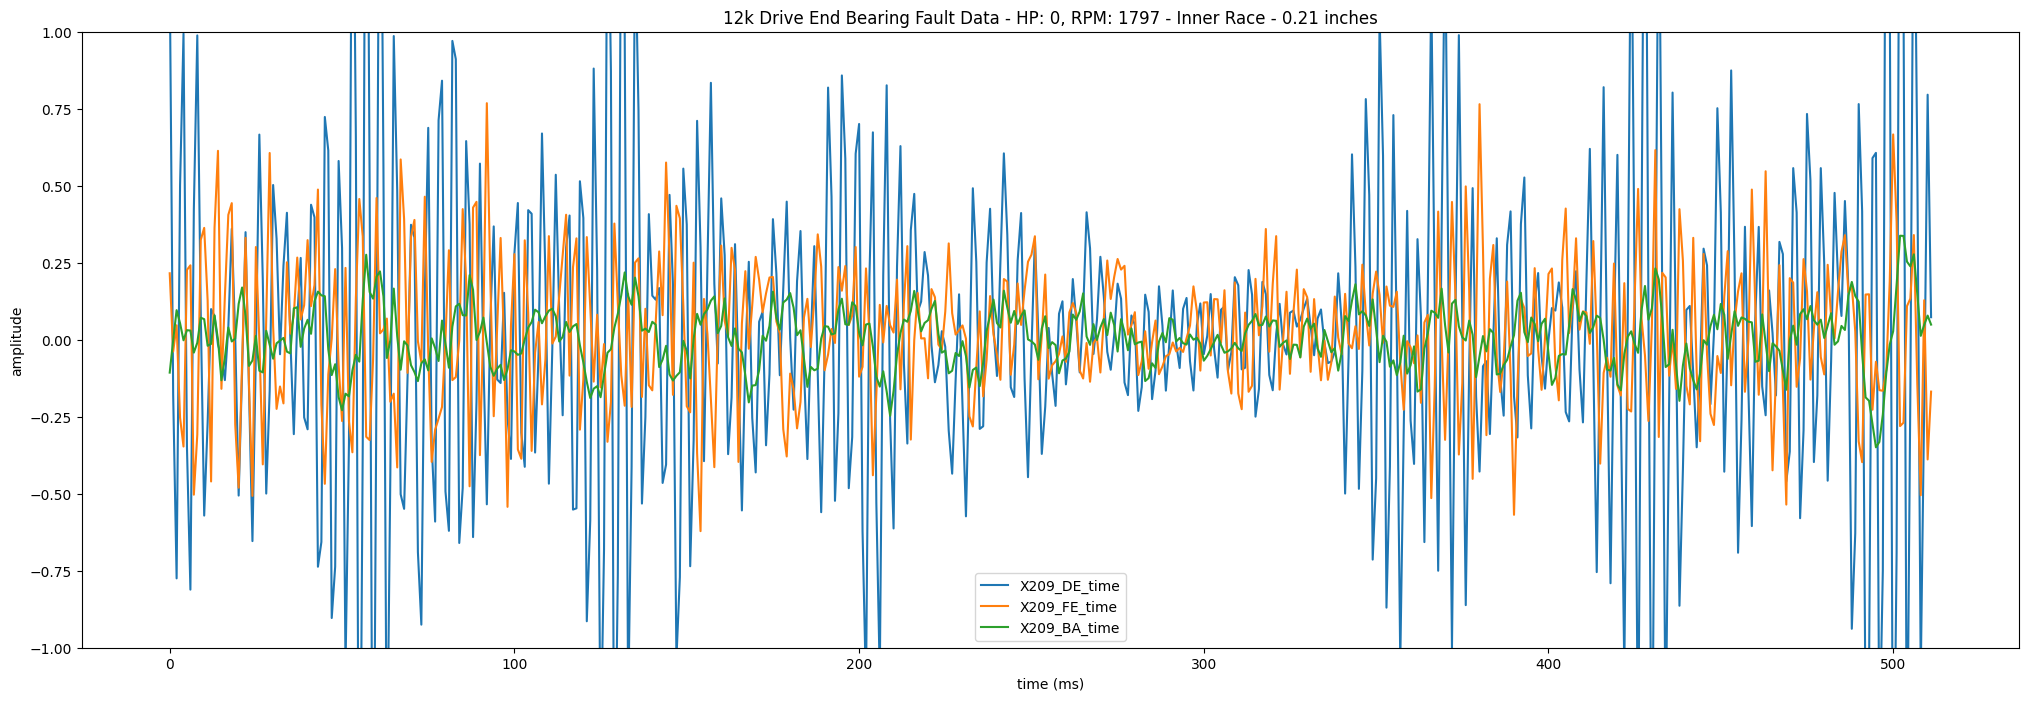

Ball


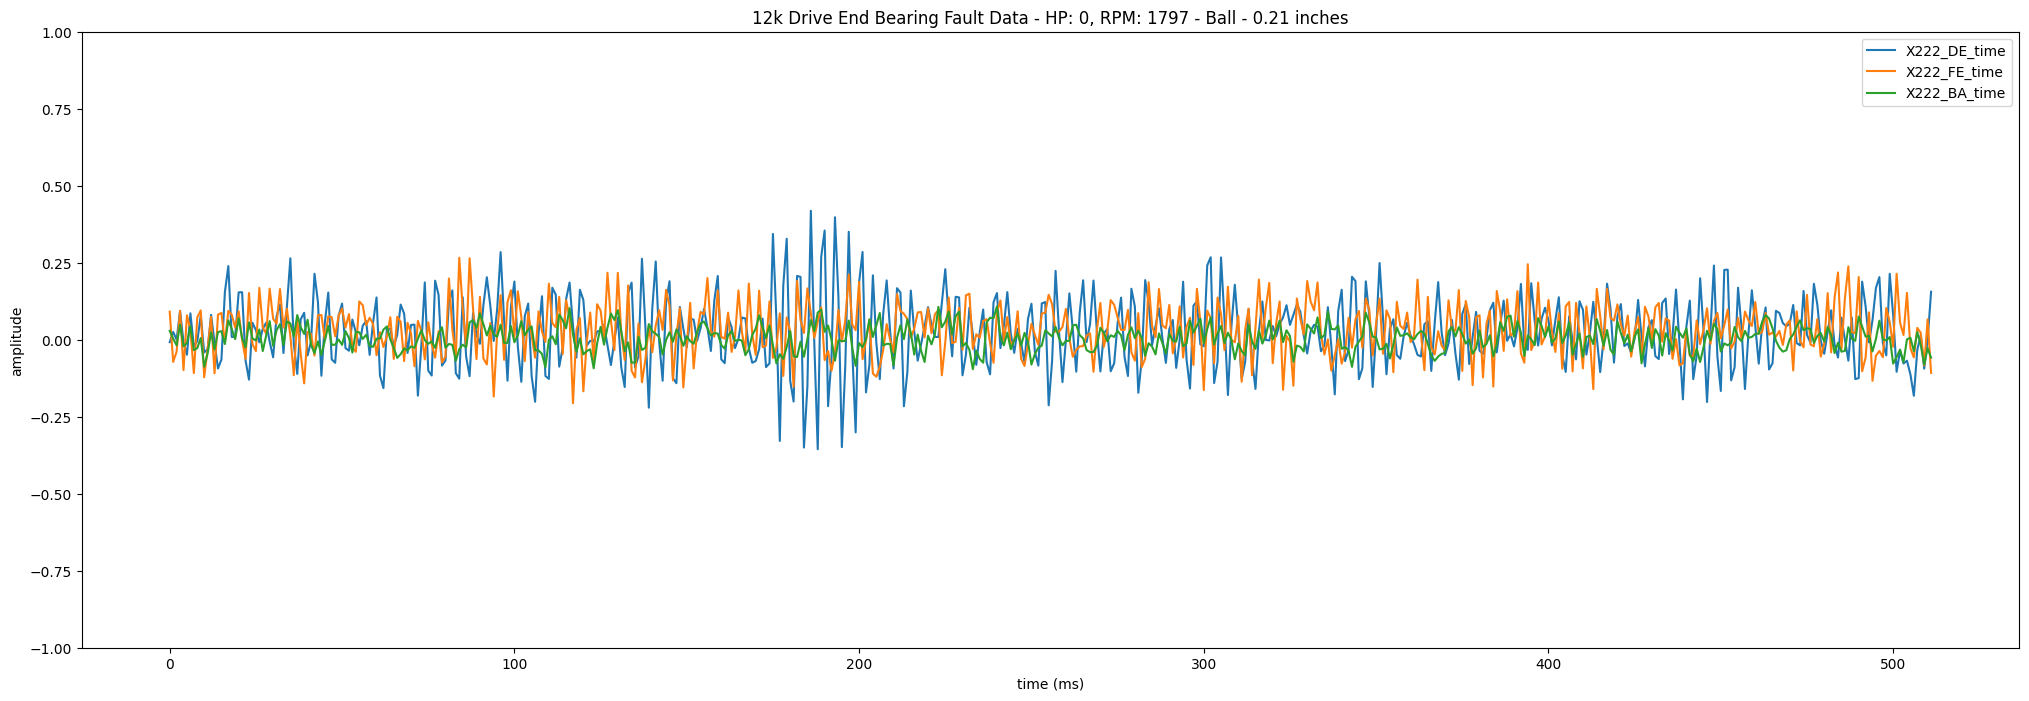

Outer Race


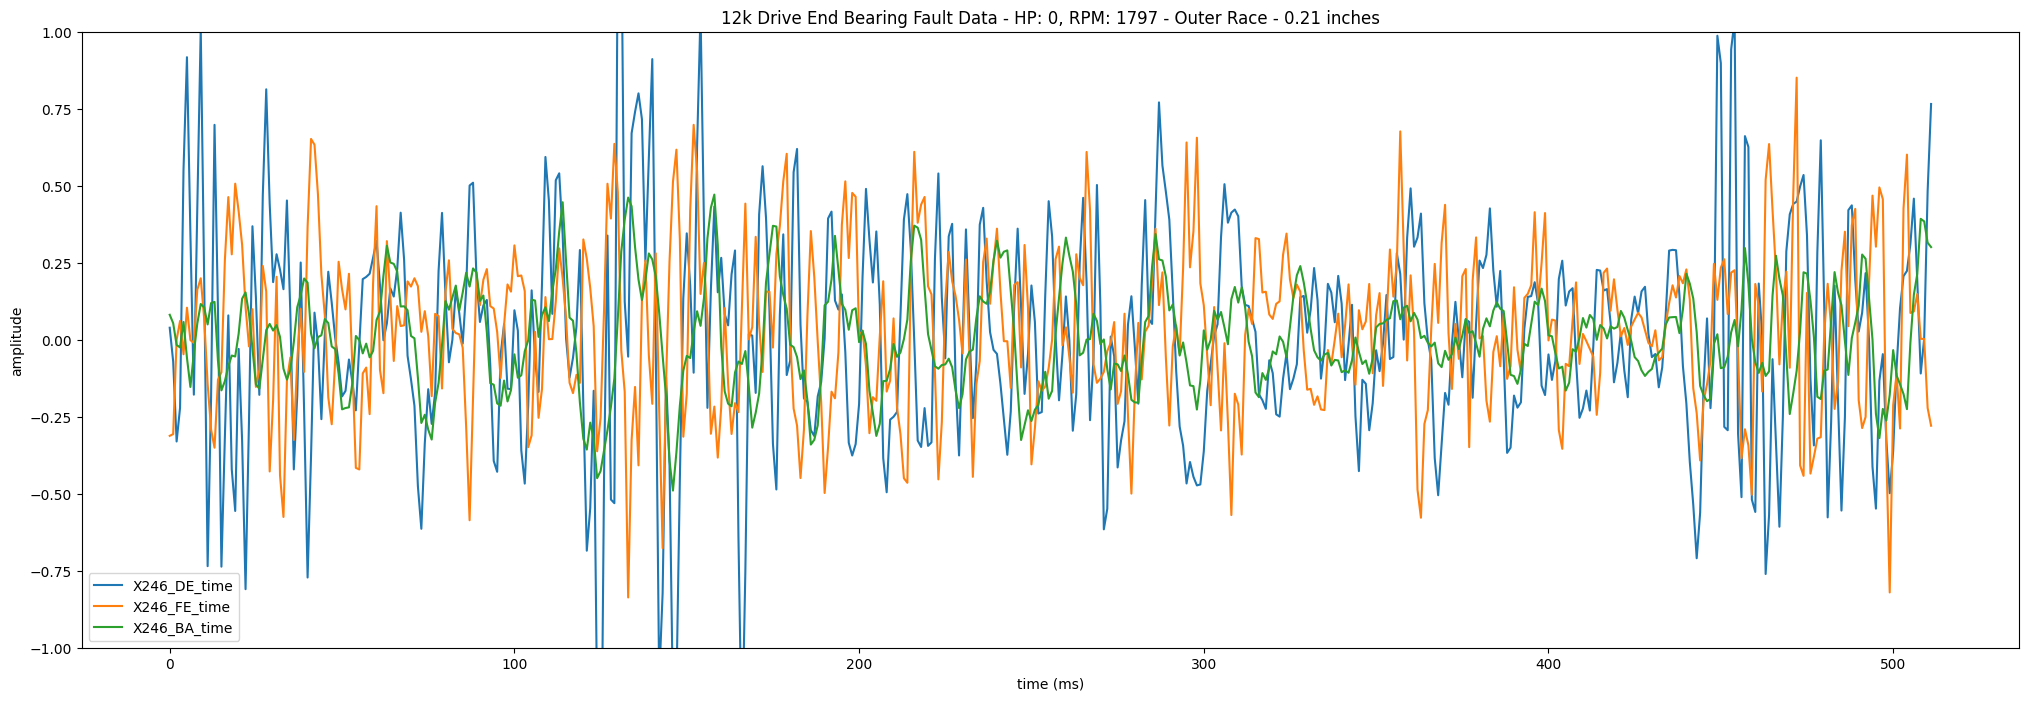

Outer Race


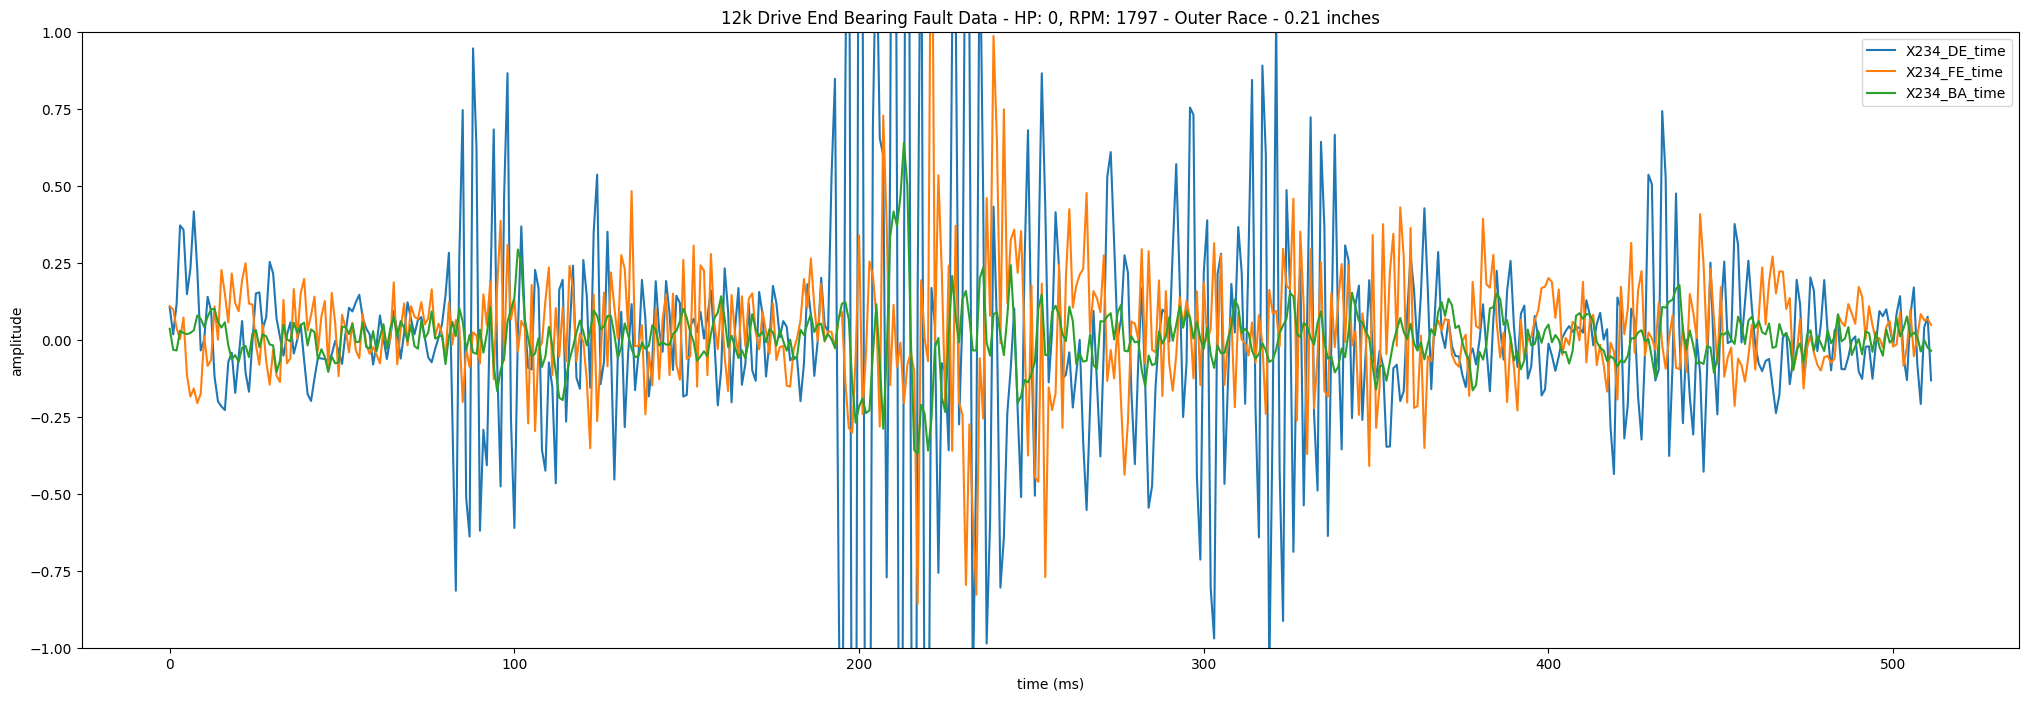

Outer Race


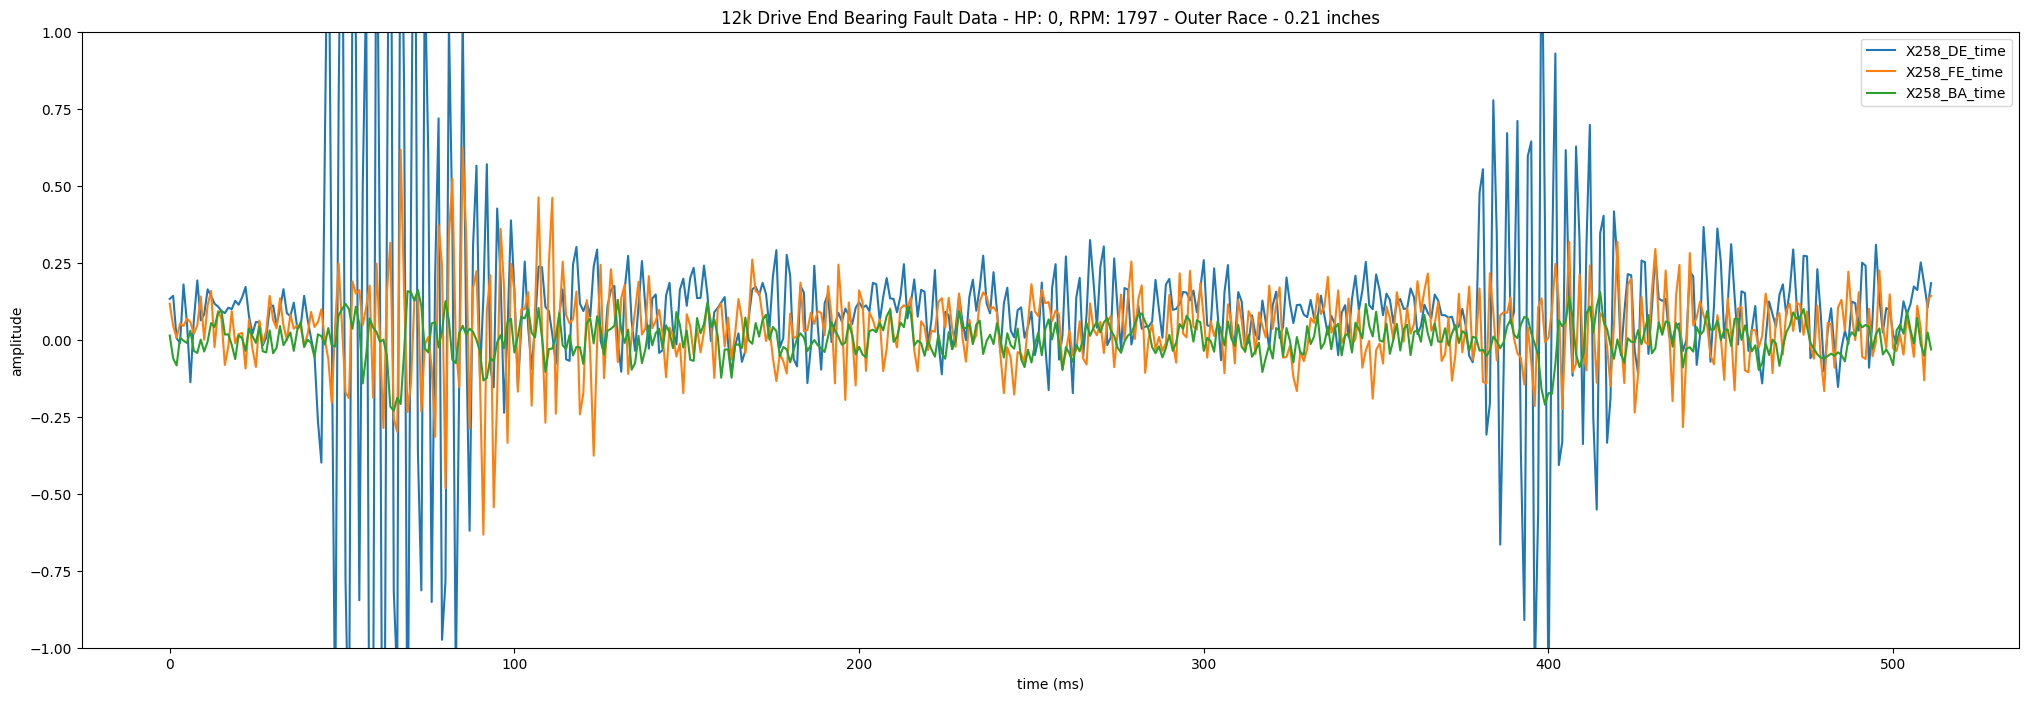

Inner Race


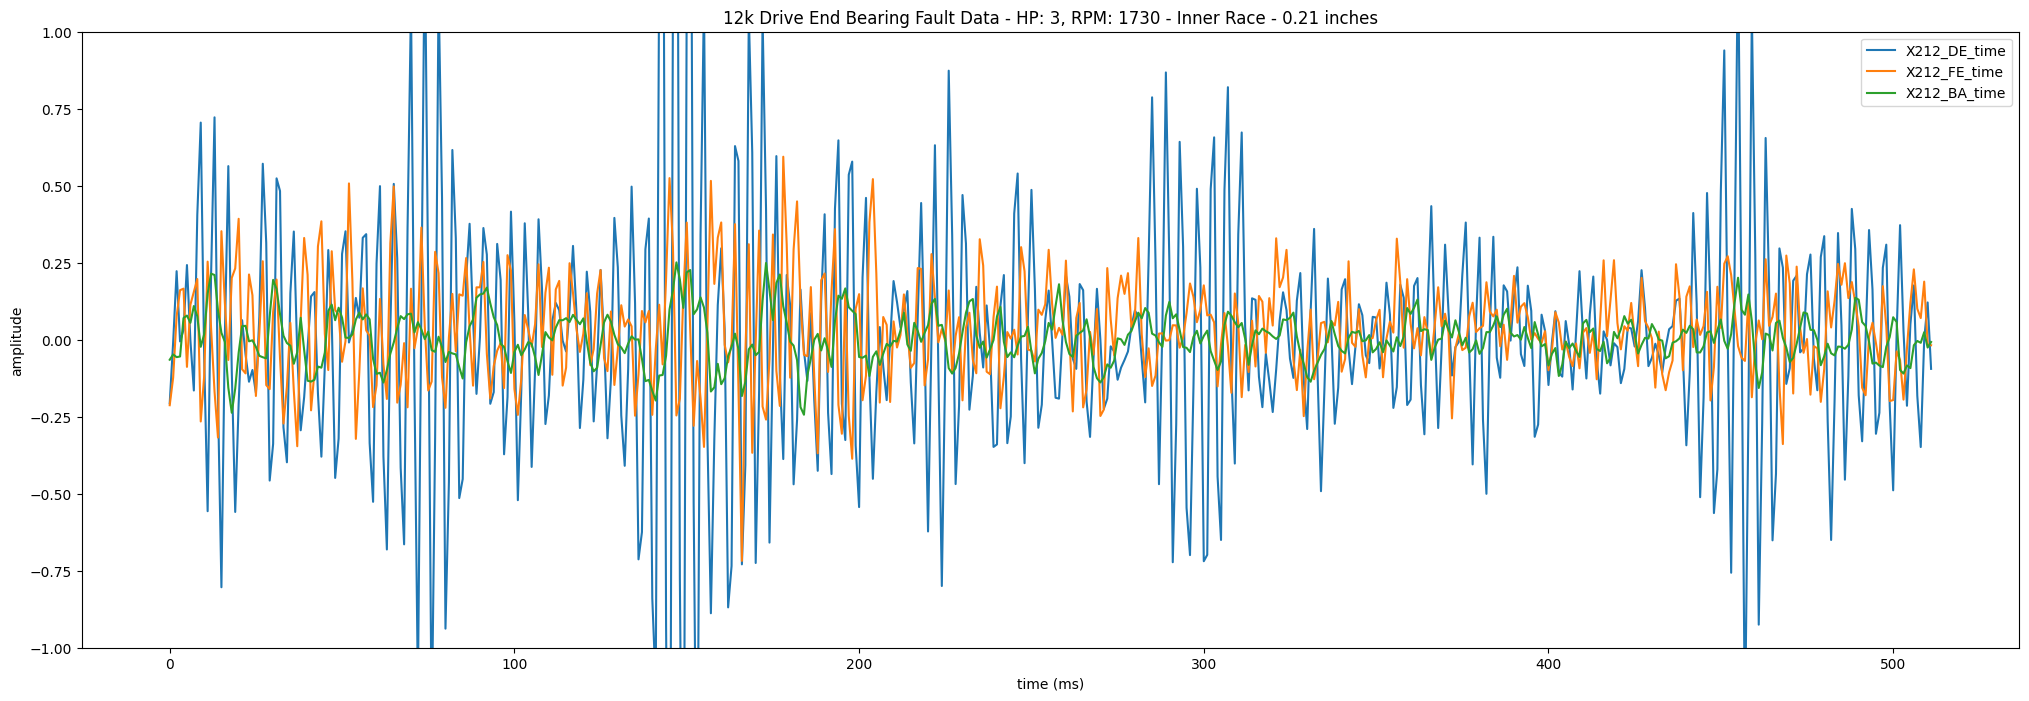

Ball


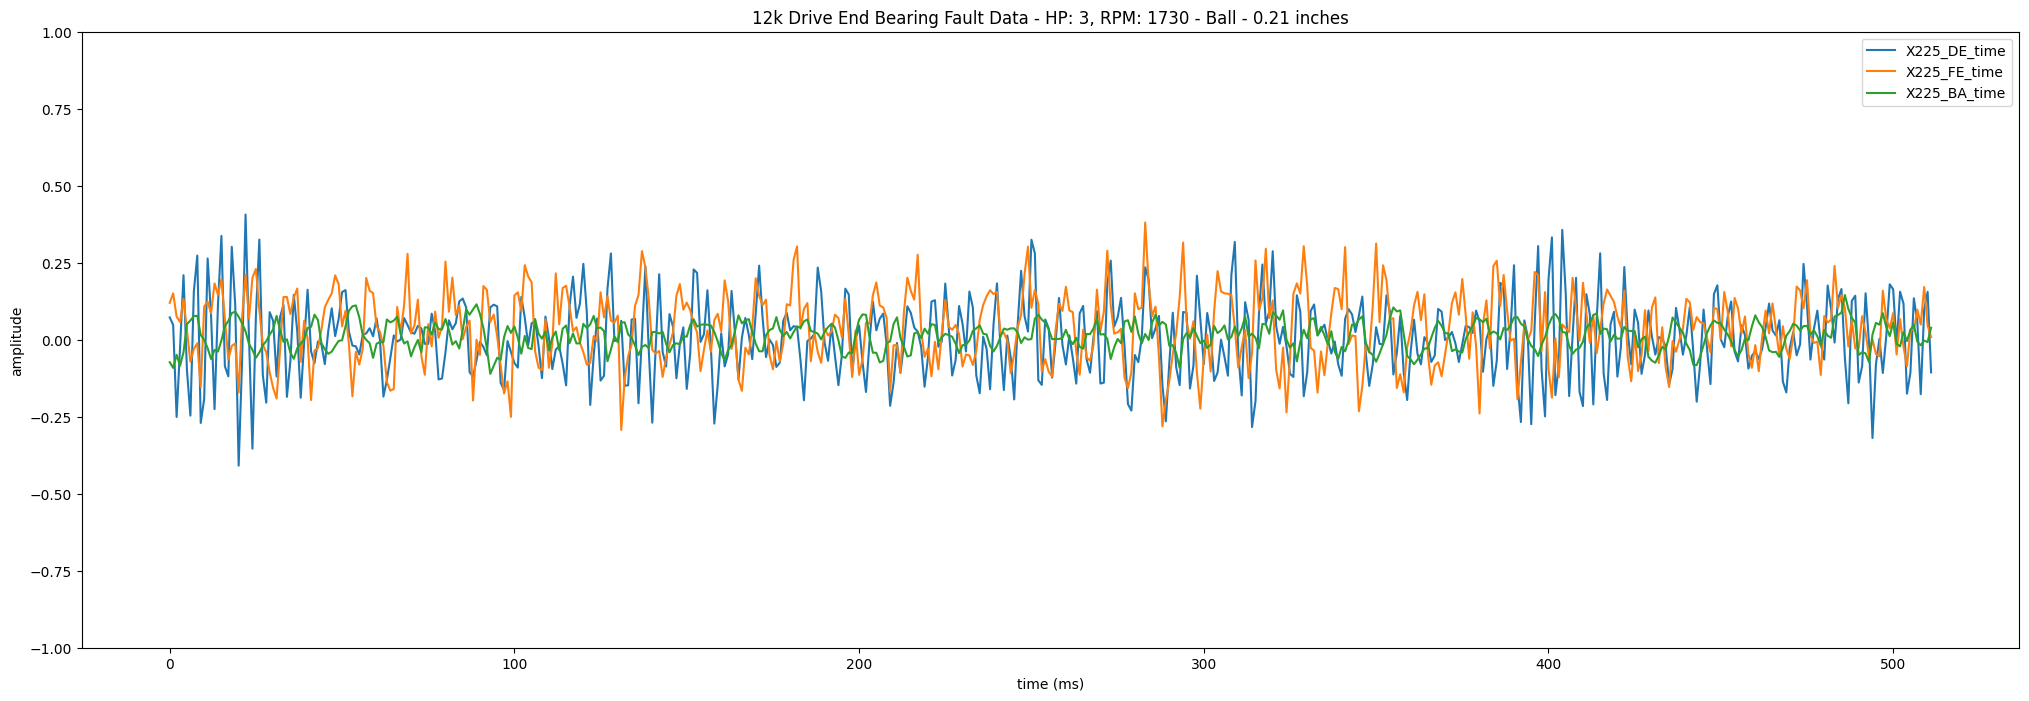

Outer Race


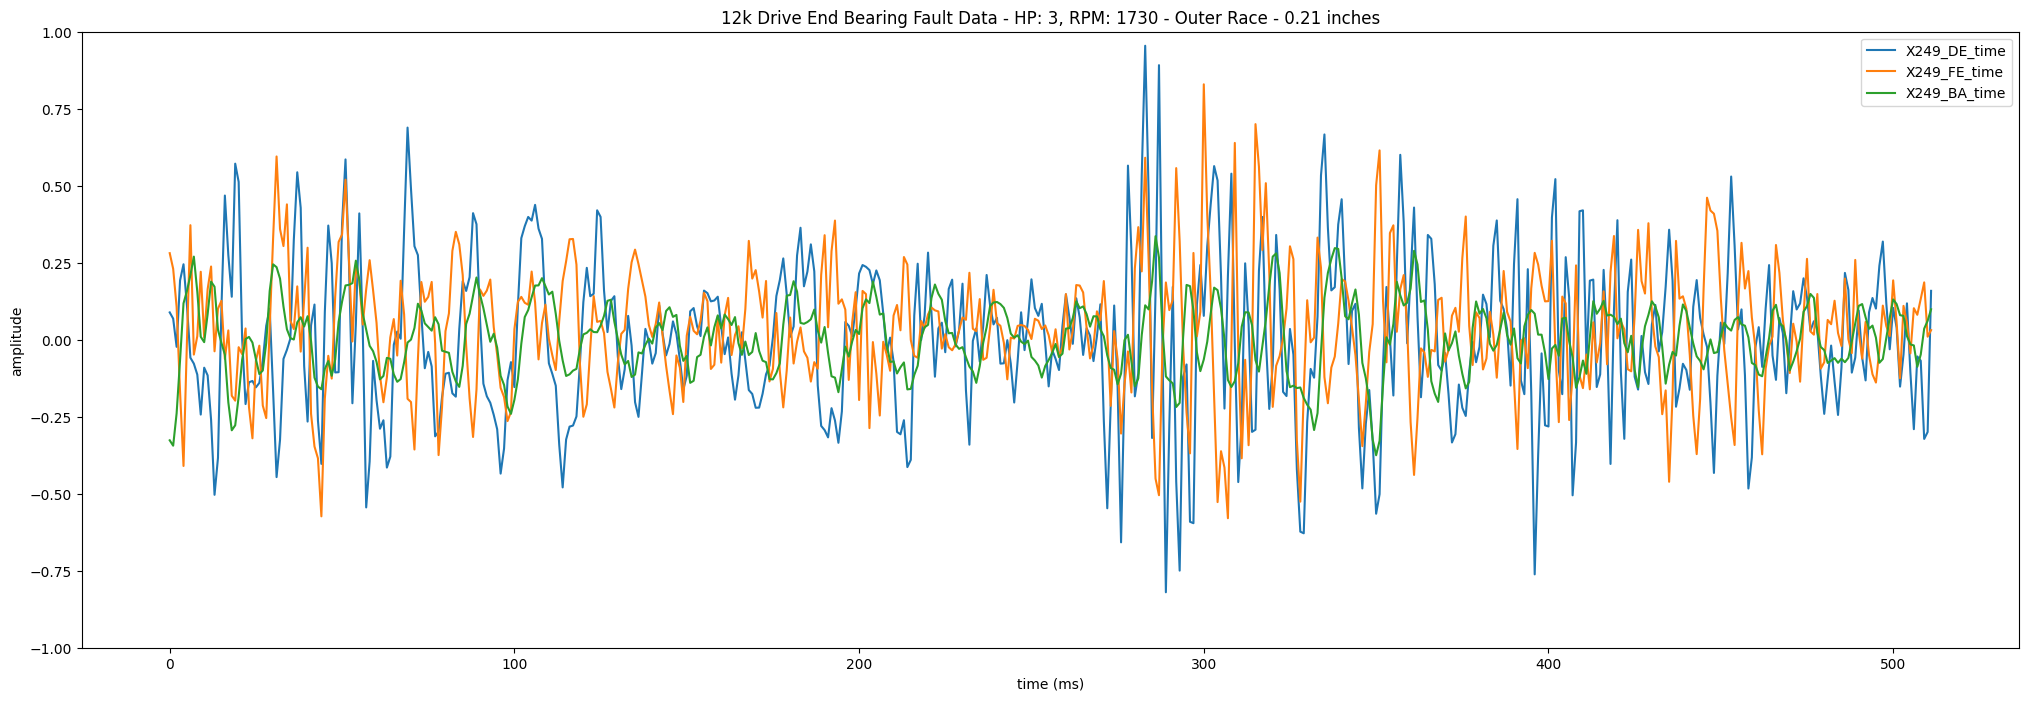

Outer Race


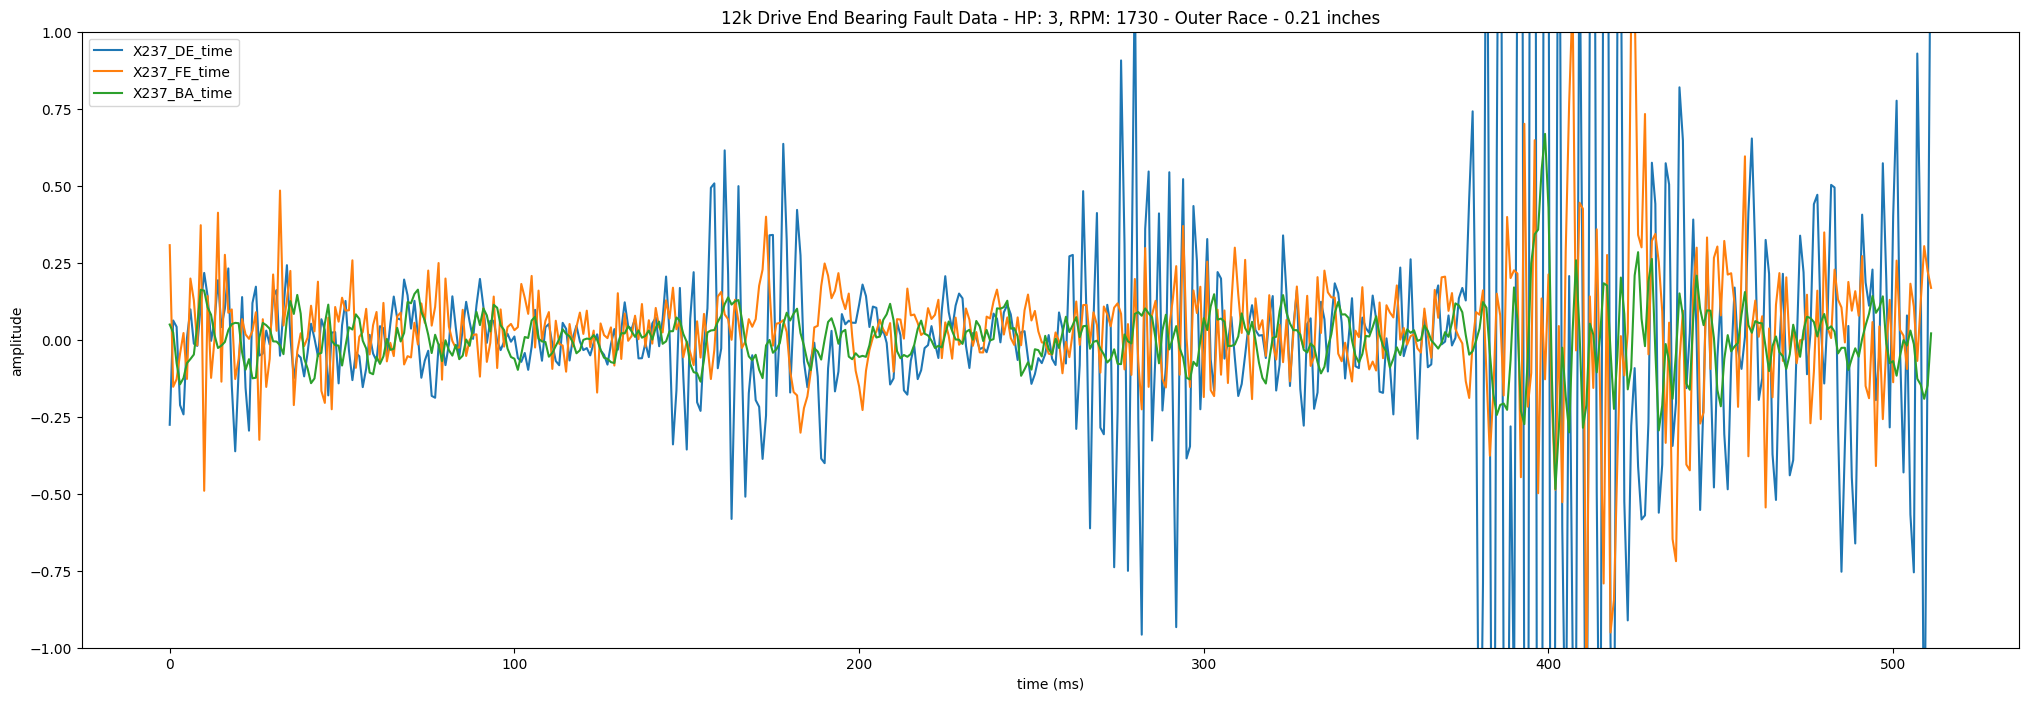

Outer Race


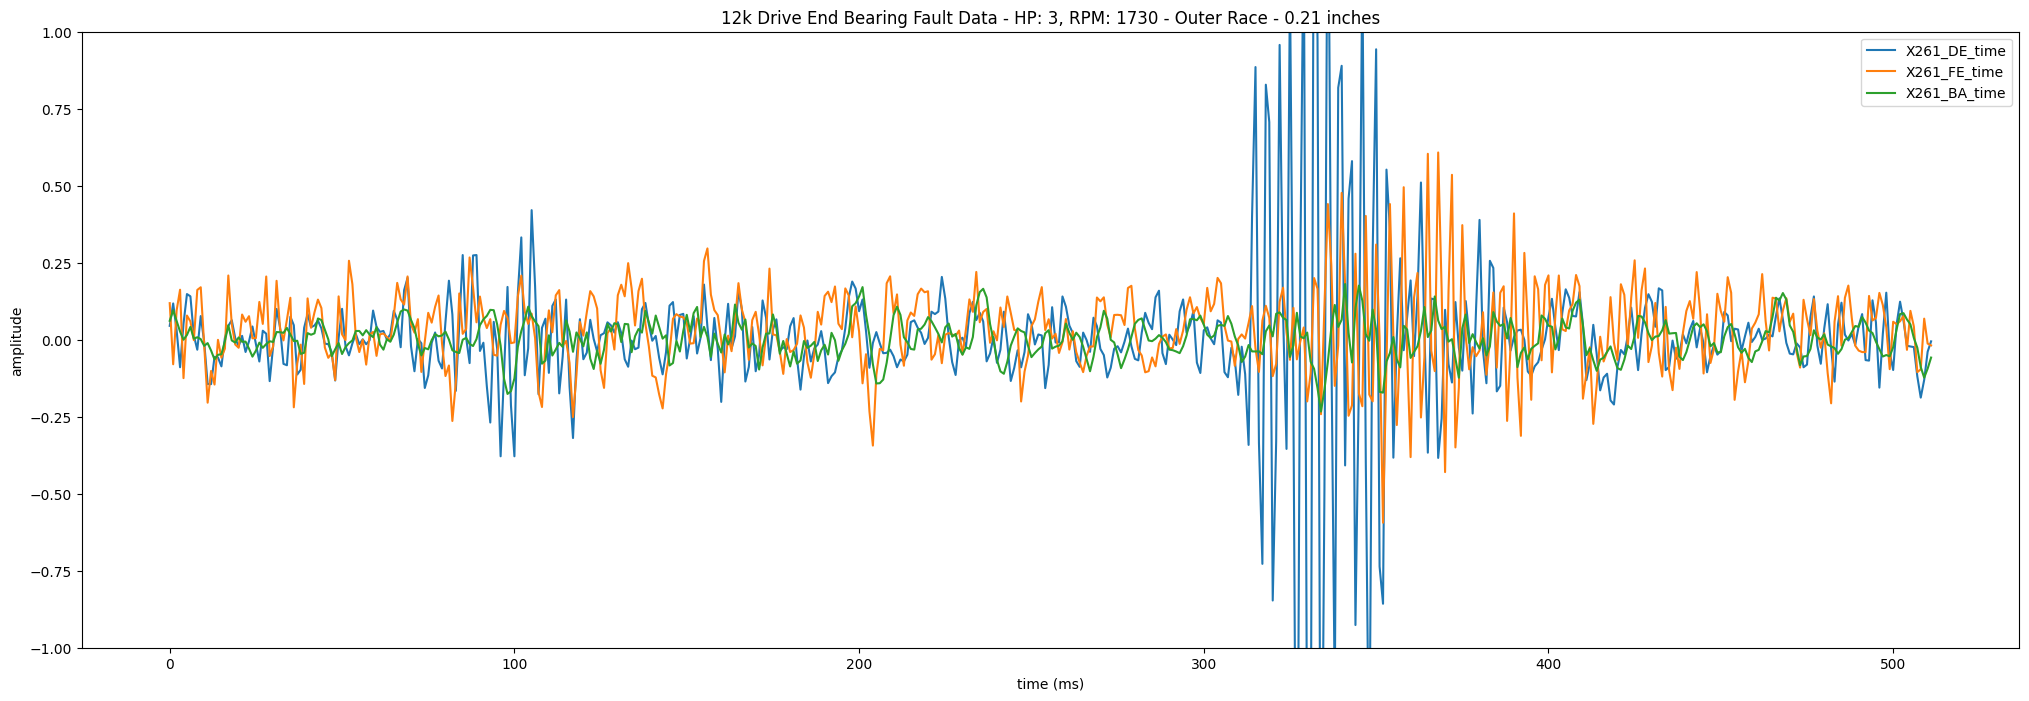

In [286]:
import re

# plotting normal baseline data
sample_size = 512

# only infos about 12k Drive End Bearing Fault.
info_filtered = [info for info in info_data if info['title'] == '12k Drive End Bearing Fault Data']

# info about the location of the fault
additional_info = {'ir': 'Inner Race', 'b0': 'Ball', 'or': 'Outer Race'}

for info in info_filtered:
    # get infos
    title, hp, rpm, file = info['title'], info['hp'], info['rpm'], info['file']
    
    additional_title = additional_info[re.search(r'^.{2}', file).group(0)]
    
    
    print(additional_title)
    
    # loading data
    file_data = load_data(file)
    
    # geting useful data
    sample = get_useful_data_by_title(file_data, sample_size)
    
    plot(sample, title=f'{title} - HP: {hp}, RPM: {rpm} - {additional_title} - 0.21 inches', label=sample.columns)